Error poly: 1.9721522630525295e-31

Cost prior descent: 0.07236360201799752

ZZZZZ
[0.625 0.696 0.763 0.832 0.909 1.    1.111 1.248 1.417 1.624 1.875]
ZZZZZ
[0.41990243 0.49311482 0.56193999 0.63236872 0.71039179 0.802
 0.91318413 1.04993496 1.21824329 1.4240999  1.67349557]
ZZZZZ
[0.25176931 0.32685984 0.39724884 0.46891781 0.54784825 0.64002167
 0.75141957 0.88802345 1.05581481 1.26077516 1.508886  ]
ZZZZZ
[0.11388572 0.19057967 0.2623175  0.33507135 0.41481338 0.50751574
 0.61915057 0.75569003 0.92310627 1.12737142 1.37445765]
ZZZZZ
[7.57488680e-04 7.88288775e-02 1.51738462e-01 2.25448972e-01
 3.05923134e-01 3.99123679e-01 5.11013334e-01 6.47554827e-01
 8.14710889e-01 1.01844425e+00 1.26471763e+00]
ZZZZZ
[-0.09211074 -0.01284799  0.06108734  0.13564849  0.2167887   0.31046122
  0.42261928  0.55921613  0.72620501  0.92953916  1.17517182]
ZZZZZ
[-0.1683971  -0.08809641 -0.01325592  0.06206805  0.1438192   0.23794121
  0.35037777  0.48707257  0.6539693   0.85701166  1.10214332]
ZZZZZ
[

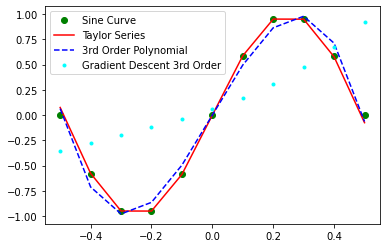

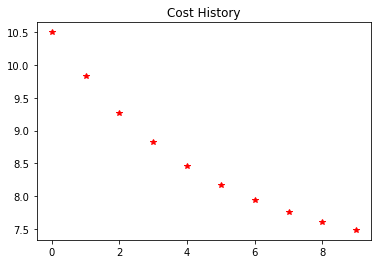

3rd Order Poly Weights: 
[-5.58865654e-18  5.17147161e+00  9.09401985e-18 -2.11939582e+01]

3rd Order Gradient Descent Weights: 
[0.05802634 1.03691425 0.89264835 0.98414243]

Taylor Weights: 
[ 7.27933314e-19  5.24554439e+00 -5.49063009e-17 -2.20393307e+01]



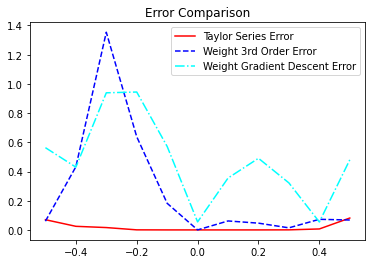

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gradient descent to approximate linear regression from 3rd order polynomial

# Methods

def taylor_series(x, order):
    maclaurin_series = []
    
    for i in range(order):
    
        negative_component = (-1)**i
        top_component = (x*2*np.pi)**((2*i)+1)
        bottom_component = math.factorial((2*i) + 1)
        maclaurin_series.append(negative_component*(top_component/bottom_component))

    maclaurin_series = sum(maclaurin_series)
    return maclaurin_series
    
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

def predict(w, A):
    z = np.dot(A, w)
    
    print("ZZZZZ")
    print(z)
    return sigmoid(z)
    
def design_matrix(order, x):
    
    A= np.zeros([len(x), order])
    for i in range(order):
        A[:,i] = x**i
        
    return A

    
def gradient_descent(target,A, w, epochs, learning_rate):
        
    cost_hist = np.zeros(epochs)

    for epoch in range(epochs):
        #guess = np.dot(A, w)
        guess = predict(w, A)
        cost_hist[epoch] = cost_estimate(target, guess)
        deriv_weights = A.T.dot(target-np.dot(A, w))
        w = w - ((-2)*learning_rate*deriv_weights*(1/len(target)))
    
    
    return w, cost_hist


def cost_estimate(target, guess):
    cost = np.sum(np.power(target-guess, 2))
    return cost


def pseudo_inverse(x, b, order):
    order += 1
    A = design_matrix(order, x)
    
    w = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,b))
    y = np.dot(A, w)
    return (w, y, A)


# Declare Variables
x = np.linspace(-0.5,0.5,11)
y_sin = np.sin(2*np.pi*x)
learning_rate = 0.09
iterations = 10
taylor_order = 4 # power of taylor series
poly_order = 3

# Plot Sine function
plt.figure(0)
plt.plot(x, y_sin, 'go', label = "Sine Curve")

# Determine Taylor values
y_tlr = taylor_series(x, taylor_order)

# Plot taylor values
plt.plot(x, y_tlr, 'r', label = "Taylor Series")

# Determine 3rd order values
w_poly, y_poly, a_poly = pseudo_inverse(x, y_sin, poly_order)

# Plot 3rd order values
plt.plot(x, y_poly, 'b--', label = "3rd Order Polynomial")

# Perform gradient descent on 3rd order polynomial
print("Error poly: {}\n".format(sum((y_sin-y_poly))**2))
print("Cost prior descent: {}\n".format(cost_estimate(y_sin, np.dot(a_poly, w_poly))))
w_polyo = w_poly
w_poly = np.ones(4)
w_new, cost_hist = gradient_descent(y_sin, a_poly, w_poly, iterations, learning_rate)
y_new = np.dot(a_poly, w_new)
print(w_new)
print("Error initial descent: {}".format(sum((y_sin-y_new))**2))
plt.figure(2)
plt.plot(np.linspace(0, iterations-1, iterations), cost_hist, 'r*')
plt.title("Cost History")
print("Initial Cost: {}\n".format(cost_hist[0]))
print("End Cost: {}\n".format(cost_hist[-1]))

#plt.figure(3)
#plt.plot(np.linspace(0, iterations-1, iterations), grad_hist, 'b*')
#plt.title("Gradient History")

plt.figure(0)

w_tlr, y_f, A_f,  = pseudo_inverse(x, y_tlr, 3)
#w_tlr/=(2*np.pi)
#y_f = np.dot(a_poly, w_tlr)
#plt.plot(x, y_f, 'x', color = 'green', label = 'tlr')
# Plot new 3rd order
plt.plot(x, y_new, '.', color = 'cyan', label = 'Gradient Descent 3rd Order')
plt.legend()
plt.show()



print("3rd Order Poly Weights: \n{}\n".format(w_polyo))
print("3rd Order Gradient Descent Weights: \n{}\n".format(w_new))
print("Taylor Weights: \n{}\n".format(w_tlr))

# Error Plot
plt.figure(1)

taylor_error = np.abs((y_sin-y_tlr)/(y_tlr+(1**-9)))
poly_error = np.abs((y_sin - y_poly)/(y_poly+(1**-9)))
gradient_error = np.abs((y_sin - y_new)/(y_new+(1**-9)))

#taylor_error = ((y_sin - y_tlr)**2)
#poly_error = ((y_sin - y_poly)**2)
#gradient_error = ((y_sin - y_new)**2)


plt.title("Error Comparison")
plt.plot(x, taylor_error, "r", label = "Taylor Series Error")
plt.plot(x, poly_error, "b--", label = "Weight 3rd Order Error")
plt.plot(x, gradient_error, '-.', color = "cyan", label = "Weight Gradient Descent Error")
plt.legend()

plt.show()